<a href="https://colab.research.google.com/github/santiagorodmon/React-two-effects-vite/blob/main/Fase%202%20%E2%80%93%20Reconocimiento%20de%20los%20modelos%20econom%C3%A9tricos%20de%20Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalar y cargar el paquete

In [1]:
install.packages("wooldridge")
library(wooldridge)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Ver qué bases de datos hay disponibles

In [2]:
data(package = "wooldridge")

##Llamar una base específica

In [3]:
data("meap93", package = "wooldridge")
head(meap93)

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.4,1862,112.6,5765,37498,7420,2.9,89.2,56.4,67.9,44918,10.71259,8.659560,7.529407,4.723842,0.1978772,10.53204
2,2.3,11355,101.2,6601,48722,10370,1.3,91.4,42.7,65.3,59092,10.98685,8.794976,9.337414,4.617099,0.2128402,10.79389
3,2.7,7685,114.0,6834,44541,7313,3.5,91.4,43.8,54.3,51854,10.85619,8.829665,8.947025,4.736198,0.1641858,10.70417
4,3.4,1148,85.4,3586,31566,5989,3.6,86.6,25.3,60.0,37555,10.53356,8.184793,7.045776,4.447346,0.1897295,10.35984
5,3.4,1572,96.1,3847,29781,5545,0.0,100.0,15.3,65.8,35326,10.47237,8.255049,7.360104,4.565389,0.1861925,10.30163
6,3.4,2496,101.1,5070,36801,5895,2.7,89.2,46.0,60.5,42696,10.66186,8.531096,7.822445,4.616110,0.1601859,10.51328


##Usar summary() para una vista rápida

In [4]:
summary(meap93)

    lnchprg          enroll          staff            expend    
 Min.   : 1.40   Min.   :  212   Min.   : 65.90   Min.   :3332  
 1st Qu.:14.62   1st Qu.: 1038   1st Qu.: 91.45   1st Qu.:3821  
 Median :23.85   Median : 1840   Median : 99.00   Median :4145  
 Mean   :25.20   Mean   : 2664   Mean   :100.64   Mean   :4377  
 3rd Qu.:33.83   3rd Qu.: 3085   3rd Qu.:108.03   3rd Qu.:4659  
 Max.   :79.50   Max.   :16793   Max.   :166.60   Max.   :7419  
     salary         benefits        droprate         gradrate     
 Min.   :19764   Min.   :    0   Min.   : 0.000   Min.   : 23.50  
 1st Qu.:28186   1st Qu.: 5536   1st Qu.: 1.900   1st Qu.: 77.00  
 Median :31266   Median : 6304   Median : 3.700   Median : 86.30  
 Mean   :31775   Mean   : 6463   Mean   : 5.066   Mean   : 83.65  
 3rd Qu.:34500   3rd Qu.: 7228   3rd Qu.: 6.500   3rd Qu.: 93.22  
 Max.   :52812   Max.   :11618   Max.   :61.900   Max.   :127.10  
     math10          sci11          totcomp         ltotcomp    
 Min.   : 1

## Seleccionamos solo las columnas numéricas

In [5]:
numeric_vars <- meap93[sapply(meap93, is.numeric)]

## Construimos el resumen estadistico

In [6]:
resumen <- data.frame(
  Media = sapply(numeric_vars, mean, na.rm = TRUE),
  Desv_Estandar = sapply(numeric_vars, sd, na.rm = TRUE),
  Varianza = sapply(numeric_vars, var, na.rm = TRUE),
  Minimo = sapply(numeric_vars, min, na.rm = TRUE),
  Maximo = sapply(numeric_vars, max, na.rm = TRUE)
)

print(resumen)

                Media Desv_Estandar     Varianza       Minimo       Maximo
lnchprg  2.520147e+01  1.361008e+01 1.852342e+02     1.400000 7.950000e+01
enroll   2.663806e+03  2.696821e+03 7.272841e+06   212.000000 1.679300e+04
staff    1.006417e+02  1.329952e+01 1.768772e+02    65.900002 1.666000e+02
expend   4.376578e+03  7.757897e+02 6.018497e+05  3332.000000 7.419000e+03
salary   3.177451e+04  5.038304e+03 2.538451e+07 19764.000000 5.281200e+04
benefits 6.463429e+03  1.456338e+03 2.120919e+06     0.000000 1.161800e+04
droprate 5.066422e+00  5.485072e+00 3.008602e+01     0.000000 6.190000e+01
gradrate 8.365172e+01  1.336838e+01 1.787135e+02    23.500000 1.271000e+02
math10   2.410686e+01  1.049361e+01 1.101159e+02     1.900000 6.670000e+01
sci11    4.918309e+01  1.252467e+01 1.568673e+02     7.200000 8.570000e+01
totcomp  3.823794e+04  5.985086e+03 3.582125e+07 24498.000000 6.351800e+04
ltotcomp 1.053996e+01  1.512674e-01 2.288182e-02    10.106347 1.105908e+01
lexpend  8.370177e+00  1.

##Calcular la matriz de correlación

In [8]:
cor_matrix <- cor(numeric_vars)
print(cor_matrix)

            lnchprg       enroll        staff       expend      salary
lnchprg   1.0000000 -0.163307776  0.148775083 -0.188408256 -0.39471777
enroll   -0.1633078  1.000000000 -0.017290618  0.381377800  0.47950733
staff     0.1487751 -0.017290618  1.000000000  0.526423158 -0.25725830
expend   -0.1884083  0.381377800  0.526423158  1.000000000  0.65029600
salary   -0.3947178  0.479507329 -0.257258300  0.650295996  1.00000000
benefits -0.1210321  0.281820719 -0.168983244  0.471413413  0.56666864
droprate  0.2382141 -0.000825345  0.041866082  0.002288145 -0.07292528
gradrate -0.3166901 -0.033441001 -0.013463596  0.031833727  0.08478828
math10   -0.4135627  0.071698984 -0.005790863  0.181550267  0.23911984
sci11    -0.4160599  0.061804154 -0.058327944  0.062092778  0.14157655
totcomp  -0.3617277  0.472228756 -0.257680864  0.662133490  0.97969598
ltotcomp -0.3720374  0.468786217 -0.280778169  0.644076059  0.97494386
lexpend  -0.1927042  0.382733858  0.518473237  0.994902325  0.65565216
lenrol

## Visualización gráfica

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



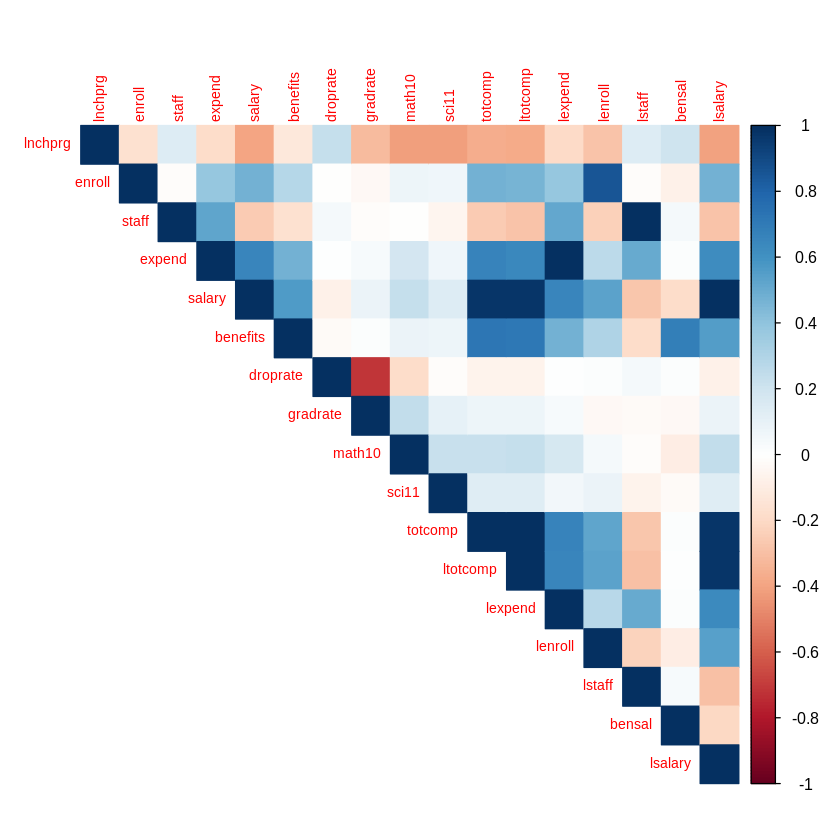

In [9]:
install.packages("corrplot")
library(corrplot)

corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.7)

## Estimar modelo de regresión lineal simple

In [11]:
y_var <- "math10"   # variable dependiente
x_var <- "lexpend"  # variable explicativa

# Crea la fórmula y filtra observaciones completas para esas dos variables
form <- as.formula(paste(y_var, "~", x_var))
df <- meap93[, c(y_var, x_var)]
df <- na.omit(df)

     math10         lexpend     
 Min.   : 1.90   Min.   :8.111  
 1st Qu.:16.62   1st Qu.:8.248  
 Median :23.40   Median :8.330  
 Mean   :24.11   Mean   :8.370  
 3rd Qu.:30.05   3rd Qu.:8.447  
 Max.   :66.70   Max.   :8.912  

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'


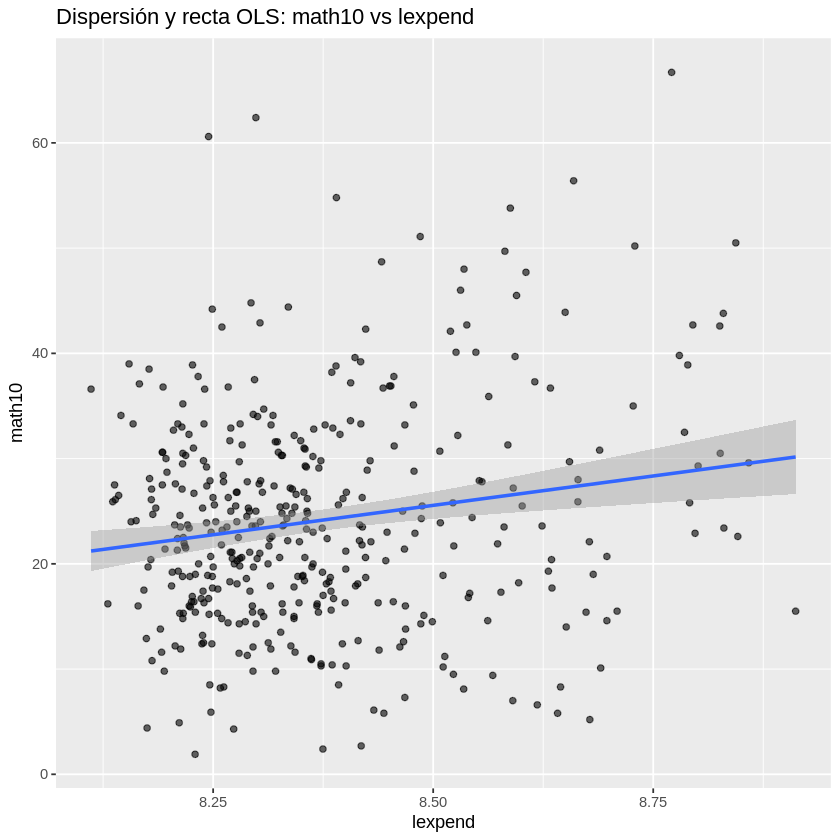

In [13]:
library(ggplot2)
summary(df)

ggplot(df, aes_string(x = x_var, y = y_var)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = paste("Dispersión y recta OLS:", y_var, "vs", x_var),
       x = x_var, y = y_var)


In [14]:
mod <- lm(form, data = df)
summary(mod)           # coeficientes, errores estándar clásicos, t, R2, etc


Call:
lm(formula = form, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.343  -7.100  -0.914   6.148  39.093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -69.341     26.530  -2.614 0.009290 ** 
lexpend       11.164      3.169   3.523 0.000475 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 406 degrees of freedom
Multiple R-squared:  0.02966,	Adjusted R-squared:  0.02727 
F-statistic: 12.41 on 1 and 406 DF,  p-value: 0.0004752


In [15]:
coefs <- coef(mod)
b0 <- unname(coefs[1])
b1 <- unname(coefs[2])

# Ecuación:  ŷ = b0 + b1 * X
cat(sprintf("Ecuación estimada:\n  %s_hat = %.4f + (%.4f) * %s\n",
            y_var, b0, b1, x_var))

Ecuación estimada:
  math10_hat = -69.3411 + (11.1644) * lexpend


In [16]:
# Modelo múltiple con 3 variables explicativas
mod2 <- lm(math10 ~ lexpend + lnchprg + lstaff, data = meap93)
summary(mod2)


Call:
lm(formula = math10 ~ lexpend + lnchprg + lstaff, data = meap93)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.211  -6.268  -1.439   4.849  43.596 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.11775   25.44389  -0.751   0.4529    
lexpend       6.81218    3.55825   1.914   0.0563 .  
lnchprg      -0.30145    0.03692  -8.166 4.13e-15 ***
lstaff       -1.34629    4.50827  -0.299   0.7654    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.537 on 404 degrees of freedom
Multiple R-squared:  0.1801,	Adjusted R-squared:  0.174 
F-statistic: 29.58 on 3 and 404 DF,  p-value: < 2.2e-16
